# Mapping Carceral Extraction in Los Angeles
### Investigating the Spatial Relationship Between Arrests, Income, Demographics, and Environmental Disparities
 **Authors**: Amil Hogan  
 **Date**: February 9th,2025  


## **Overview**
This project explores how policing, income inequality, demographics, and environmental risks intersect in Los Angeles, reinforcing systemic extraction in historically marginalized communities. The portion of the project I analyzed was age and gender demographics in LA County and how they correlate with the rates of arrest. Together, using spatial analysis, we analyze:

- Arrest data across different LA neighborhoods
- Economic disparities in income and housing costs
- Environmental factors such as hazardous waste and air pollution 


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [85]:


df = pd.read_csv(
    'age_and_sex_Data.csv',
    dtype=
    {
        'Fips':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [86]:
# This creates a combined ages columns of from ages 20-34 I belive. You should double check using the meta data file

df["Age_Combined"] = df[["S0101_C01_006E", "S0101_C01_007E", "S0101_C01_008E"]].sum(axis=1)


**For this project, we used census data to create a combined age column for those aged 20-34 living within Los Angeles. We specifically chose this age group because statistically this seems to be the most vulnerable group at risk of getting arrested**

In [87]:
# cleans up the data, only keeping what we need. You can edit this and include whatever you think is relevent. 
columns_to_keep = ['Fips',
                   'S0101_C01_006E',
                   'S0101_C01_007E','S0101_C01_008E',
                   'S0101_C01_001E', "Age_Combined"]
df2 = df[columns_to_keep]

In [88]:
# listing the columns so I can just copy and paste them in the cell below and then rename them. 
columns = list(df2)
columns

['Fips',
 'S0101_C01_006E',
 'S0101_C01_007E',
 'S0101_C01_008E',
 'S0101_C01_001E',
 'Age_Combined']

In [89]:
# rename
df2.columns = ['Fips', "Age 20-24", "Age 25-29", "Age 30-34","Total Population", 'Age_Combined']

In [94]:
# Importing census tract file with a geometry column. This is what we are going to use to geocode your date. We are gonna 
# merge these two data sets based on a the 'FIPS' columns
tracts=gpd.read_file('la_county.geojson')

In [98]:
# filtering only the columns that we need
tracts = tracts[['GEOID','geometry']]
tracts.head()

,GEOID,geometry
0,06037262601,"POLYGON ((-118.57556 34.08019, -118.57497 34.0..."
1,06037300100,"POLYGON ((-118.2486 34.23881, -118.24858 34.23..."
2,06037300501,"POLYGON ((-118.24875 34.22249, -118.24875 34.2..."
3,06037310701,"POLYGON ((-118.31952 34.18495, -118.31915 34.1..."
4,06037300200,"POLYGON ((-118.24864 34.23324, -118.24863 34.2..."


In [100]:
# create a FIPS column in thise new data set that were gonna merge with the orignal. The ct20 is the same as the Fips but is 
# mussin a 06037 code in front which is for los angels. So we are gonna ad it. 
tracts['Fips'] ='06' + '037' + tracts['GEOID']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [101]:
# merging them 
tracts_age = tracts.merge(df2,on="Fips")

In [102]:
# check it out...ayee now we have a geometry column
tracts_age.head()

,GEOID,geometry,Fips,Age 20-24,Age 25-29,Age 30-34,Total Population,Age_Combined


In [105]:
!pip install mapclassify


In [97]:
import geopandas as gpd

# Load the GeoJSON file
geojson_path = "la_county.geojson"  # Ensure this matches your file path
gdf = gpd.read_file(geojson_path)

# Display column names
print(gdf.columns)


Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


In [115]:
import geopandas as gpd

In [119]:
tracts=gpd.read_file('Census_Tracts_2020.geojson')
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,06,037,262601,06037262601,2626.01,Census Tract 2626.01,G5020,S,3620351.0,0.0,+34.0738344,-118.5557893,0.108596,0.000354,"POLYGON ((-118.57556 34.08019, -118.57497 34.0..."
1,06,037,300100,06037300100,3001,Census Tract 3001,G5020,S,4591342.0,18657.0,+34.2442558,-118.2325716,0.094693,0.000451,"POLYGON ((-118.2486 34.23881, -118.24858 34.23..."
2,06,037,300501,06037300501,3005.01,Census Tract 3005.01,G5020,S,1260255.0,0.0,+34.2206887,-118.2400494,0.061435,0.000123,"POLYGON ((-118.24875 34.22249, -118.24875 34.2..."
3,06,037,310701,06037310701,3107.01,Census Tract 3107.01,G5020,S,515339.0,0.0,+34.1853923,-118.3128440,0.036201,0.000050,"POLYGON ((-118.31952 34.18495, -118.31915 34.1..."
4,06,037,300200,06037300200,3002,Census Tract 3002,G5020,S,1943986.0,10136.0,+34.2283768,-118.2386852,0.067506,0.000191,"POLYGON ((-118.24864 34.23324, -118.24863 34.2..."


In [138]:
print(tracts.columns)  # Check columns in tracts
print(df2.columns)  # Check columns in df2


Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')
Index(['Fips', 'Age 20-24', 'Age 25-29', 'Age 30-34', 'Total Population',
       'Age_Combined'],
      dtype='object')


In [173]:
print(tracts.columns)


Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'Fips', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


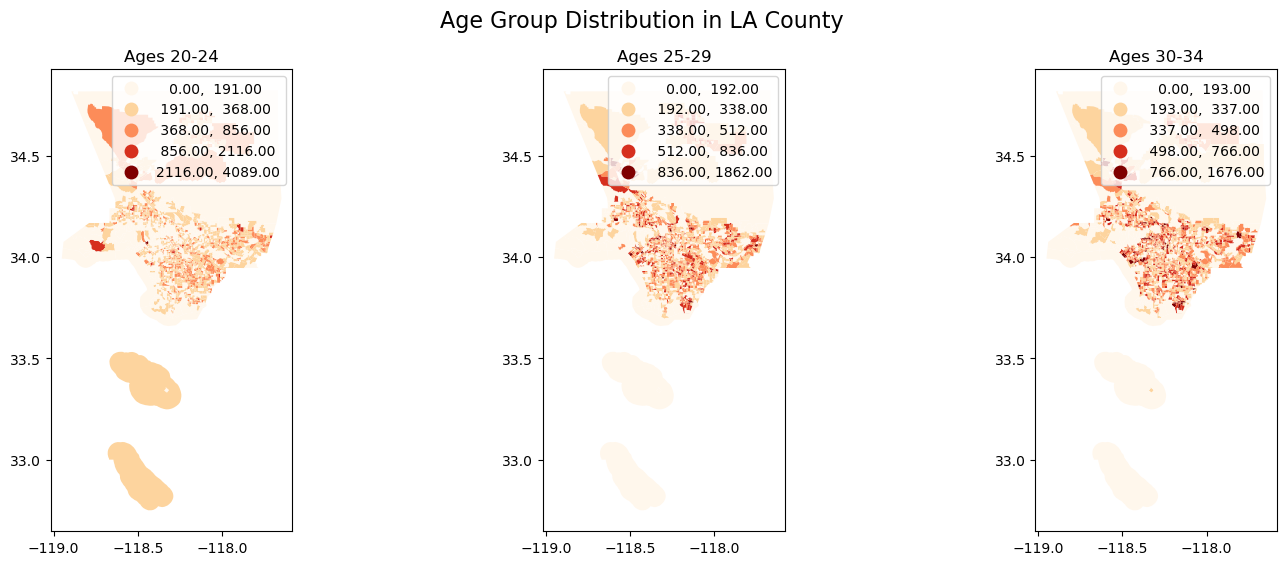

In [159]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

age_cols = ["Age 20-24", "Age 25-29", "Age 30-34"]
titles = ["Ages 20-24", "Ages 25-29", "Ages 30-34"]

for i, col in enumerate(age_cols):
    tracts_age.plot(
        column=col, cmap="OrRd", legend=True, scheme="NaturalBreaks", ax=axes[i]
    )
    axes[i].set_title(titles[i], fontsize=12)

plt.suptitle("Age Group Distribution in LA County", fontsize=16)
plt.show()


**This map shows that the 20-34 age group is highly concentrated in certain areas such as Downtown LA and South LA. These are the same areas that experience higher policing and incarceration rates as seen in other maps from my group members. This could indicate that densely populated areas where young adults reside overlap with higher arrest rates. Also, since young adults make up a significant portion in these areas, it aligns with arrest data showing that people in their 20s and early 30s are disproportionally targeted by the police**

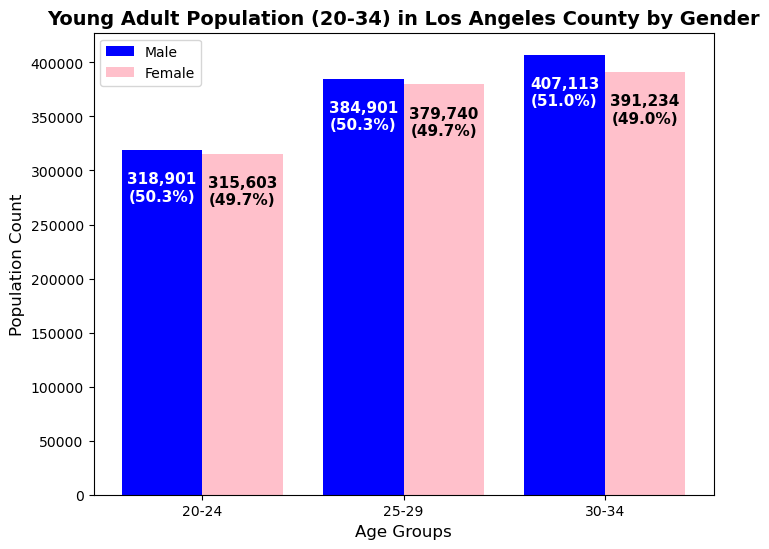

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
age_groups = ["20-24", "25-29", "30-34"]
male_population = [318901, 384901, 407113]
female_population = [315603, 379740, 391234]

# Calculate percentages
total_population = [m + f for m, f in zip(male_population, female_population)]
male_percentages = [round((m / t) * 100, 1) for m, t in zip(male_population, total_population)]
female_percentages = [round((f / t) * 100, 1) for f, t in zip(female_population, total_population)]

# Bar positions
x = np.arange(len(age_groups))

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Plot bars
bar_width = 0.4
bars_male = ax.bar(x - bar_width/2, male_population, width=bar_width, label="Male", color="blue")
bars_female = ax.bar(x + bar_width/2, female_population, width=bar_width, label="Female", color="pink")

# Add text labels inside bars (Population count and percentage)
for i, bar in enumerate(bars_male):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height - 20000, f"{male_population[i]:,}\n({male_percentages[i]}%)", 
            ha='center', va='top', fontsize=11, color='white', fontweight='bold')

for i, bar in enumerate(bars_female):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height - 20000, f"{female_population[i]:,}\n({female_percentages[i]}%)", 
            ha='center', va='top', fontsize=11, color='black', fontweight='bold')

# Titles and labels
ax.set_title("Young Adult Population (20-34) in Los Angeles County by Gender", fontsize=14, fontweight='bold')
ax.set_xlabel("Age Groups", fontsize=12)
ax.set_ylabel("Population Count", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.legend()

# Show plot
plt.show()


**This chart shows that 

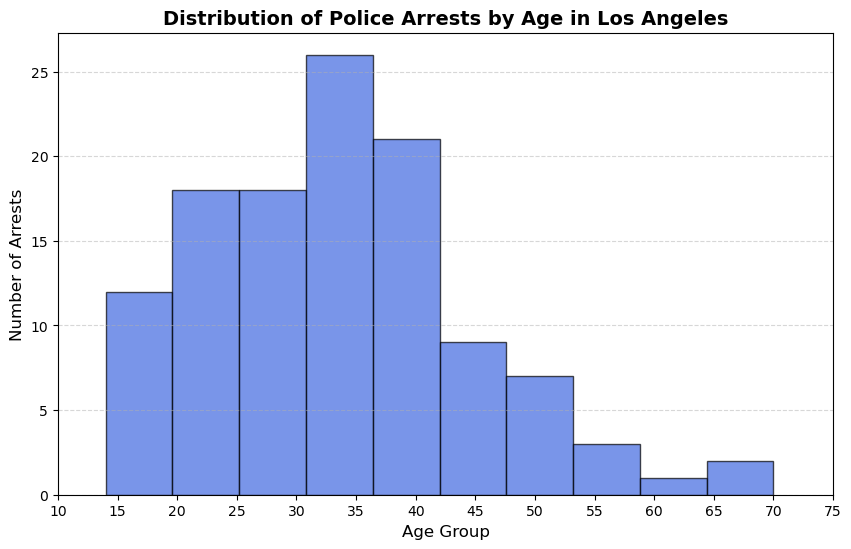

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Arrest_Data_from_2020_to_Present_20250208.csv"
df = pd.read_csv(file_path)

# Drop NaN values in 'age' column
la_shootings = la_shootings.dropna(subset=["age"])

# Convert to integers
la_shootings["age"] = la_shootings["age"].astype(int)

# Create histogram with bins (e.g., 5-year age groups)
plt.figure(figsize=(10, 6))
plt.hist(la_shootings["age"], bins=10, color="royalblue", alpha=0.7, edgecolor="black")

# Titles and labels
plt.title("Distribution of Police Arrests by Age in Los Angeles", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Arrests", fontsize=12)
plt.xticks(range(10, 80, 5))  # Show age groups every 5 years
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()


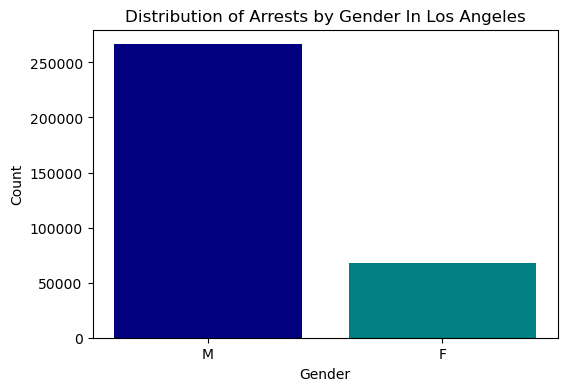

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Arrest_Data_from_2020_to_Present_20250208.csv"  # Update this with the actual file path
df = pd.read_csv(file_path)

# Count the occurrences of each sex code
sex_counts = df['Sex Code'].value_counts()

# Plot the data
plt.figure(figsize=(6, 4))
plt.bar(sex_counts.index, sex_counts.values, color=['navy', 'teal'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Arrests by Gender In Los Angeles")
plt.show()
